# Notebook Overview 

In this notebook we will plot the 3D keypoints data without the camera intrinsic parameters just to get a visual representation of the keypoint coordinates in 3dimenstion with and elvation and the azimuth angle as 0 degree

## Importing Libraries



In [62]:
import numpy as np
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
import cv2  
import os
import warnings
warnings.filterwarnings('ignore')

## Connecting Database and Loading the Data 

In this block of code we will connect to the mongodb server and load the collection which stores the 3d keypoints and load the data corresponding to a specefic objectid

In [63]:
uri = 'mongodb+srv:***'
client = MongoClient(uri)
cluster = client['ai']
collection = cluster['biped_2d']
data = list(collection.find())
df = pd.DataFrame(data)
specific_id = '000fd37d-1a61-41f5-9b44-***'  # Obj_ID
df_id = df[df['id'] == specific_id].sort_values('verticalRotation').reset_index(drop=True)


## Function to visualize the Data 

In this block of code we will define a function plot_3d_keypoints to visualize each data point that corresponds to a specefic column in our data , i.e Vertical rotation. In the function we will keep the elevation and the azimuth angle predefined as 0.

In [64]:
def plot_3d_keypoints(keypoints_3d, title='3D Keypoints Visualization'):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(projection='3d')
    xs = [v[0] for v in keypoints_3d.values()]
    ys = [v[1] for v in keypoints_3d.values()]
    zs = [v[2] for v in keypoints_3d.values()]
    labels = list(keypoints_3d.keys())
    #Connections
    skeleton_edges = [
        ('Head', 'Neck'),
        ('Neck', 'Chest'),
        ('Chest', 'Hips'),
        ('Neck', 'LeftShoulder'),
        ('LeftShoulder', 'LeftArm'),
        ('LeftArm', 'LeftForearm'),
        ('LeftForearm', 'LeftHand'),
        ('Chest', 'RightShoulder'),
        ('RightShoulder', 'RightArm'),
        ('RightArm', 'RightForearm'),
        ('RightForearm', 'RightHand'),
        ('Hips', 'LeftThigh'),
        ('LeftThigh', 'LeftLeg'),
        ('LeftLeg', 'LeftFoot'),
        ('Hips', 'RightThigh'),
        ('RightThigh', 'RightLeg'),
        ('RightLeg', 'RightFoot'),
        ('RightHand', 'RightFinger'),
        ('RightFinger', 'RightFingerEnd'),
        ('LeftHand', 'LeftFinger'),
        ('LeftFinger', 'LeftFingerEnd'),
        ('Head', 'HeadEnd'),
        ('RightFoot', 'RightHeel'),
        ('RightHeel', 'RightToe'),
        ('RightToe', 'RightToeEnd'),
        ('LeftFoot', 'LeftHeel'),
        ('LeftHeel', 'LeftToe'),
        ('LeftToe', 'LeftToeEnd')
    ]
    # Joints
    for joint1, joint2 in skeleton_edges:
        if joint1 in keypoints_3d and joint2 in keypoints_3d:
            x1, y1, z1 = keypoints_3d[joint1]
            x2, y2, z2 = keypoints_3d[joint2]
            ax.plot( [x1, x2],[y1, y2], [z1, z2], c='blue')
    # Scatter keypoints
    ax.scatter( xs,ys, zs, color='red', s=50)
    # # Label Kps
    # for label, x, y, z in zip(labels, xs, ys, zs):
    #     ax.text(x, y, z, label, color='black')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.set_title(title)
    # View set to 0 deg
    ax.view_init(elev=0, azim=0,roll=0)
    plt.show()

    return xs, ys, zs, labels

## Vertical Rotation 0 deg

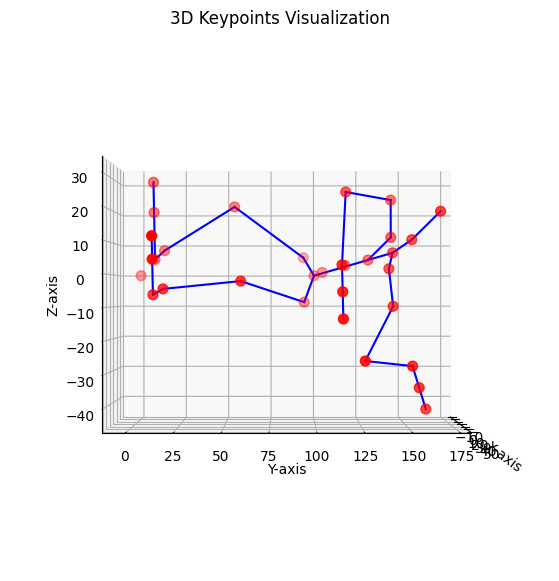

In [65]:
kp_0_2d = df_id.iloc[0]['kps_2d']
kp_0_3d = df_id.iloc[0]['kps_3d']
X_0,Y_0,Z_0,labels_0 = plot_3d_keypoints(kp_0_3d)

## Vertical Rotation 15 deg

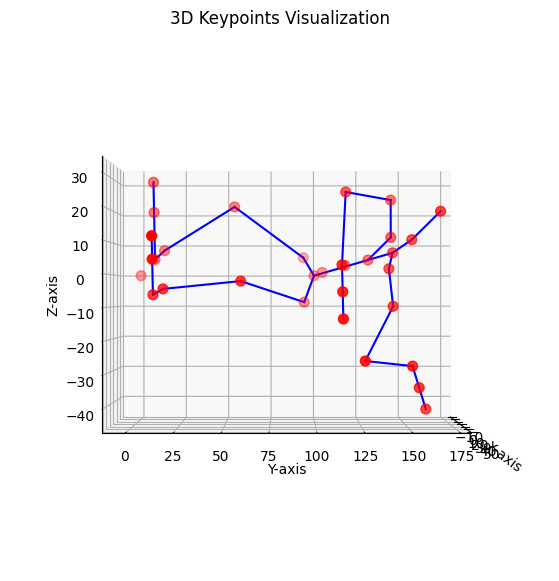

In [66]:
kp_15_2d = df_id.iloc[1]['kps_2d']
kp_15_3d = df_id.iloc[1]['kps_3d']
X_15,Y_15,Z_15,labels_15 = plot_3d_keypoints(kp_15_3d)

## Vertical Rotation 30 deg

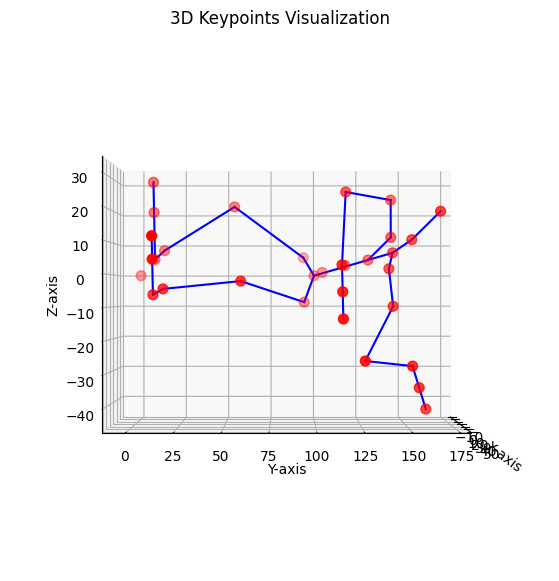

In [67]:
kp_30_2d = df_id.iloc[2]['kps_2d']
kp_30_3d = df_id.iloc[2]['kps_3d']
X_30,Y_30,Z_30,labels_30 = plot_3d_keypoints(kp_30_3d)

## Vertical Rotation 45 deg

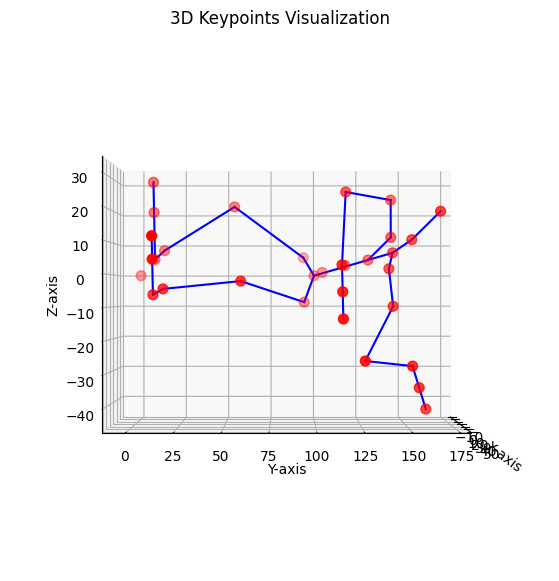

In [68]:
kp_45_2d = df_id.iloc[3]['kps_2d']
kp_45_3d = df_id.iloc[3]['kps_3d']
X_45,Y_45,Z_45,labels_45 = plot_3d_keypoints(kp_45_3d)

## Vertical Rotation 60 deg

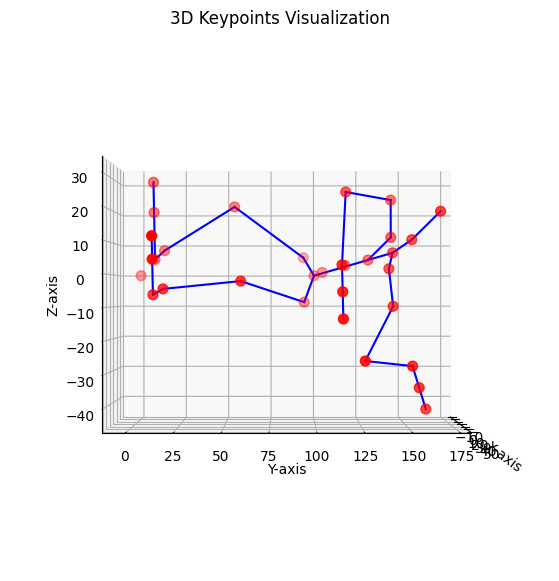

In [69]:
kp_60_2d = df_id.iloc[4]['kps_2d']
kp_60_3d = df_id.iloc[4]['kps_3d']
X_60,Y_60,Z_60,labels_60 = plot_3d_keypoints(kp_60_3d)